# First example

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

In [2]:
from network import Protocol, NetworkManager, Network
from analysis_functions import calculate_persistence_time, calculate_recall_quantities
from plotting_functions import plot_weight_matrix, plot_network_activity_angle

epsilon = 10e-80

## The example

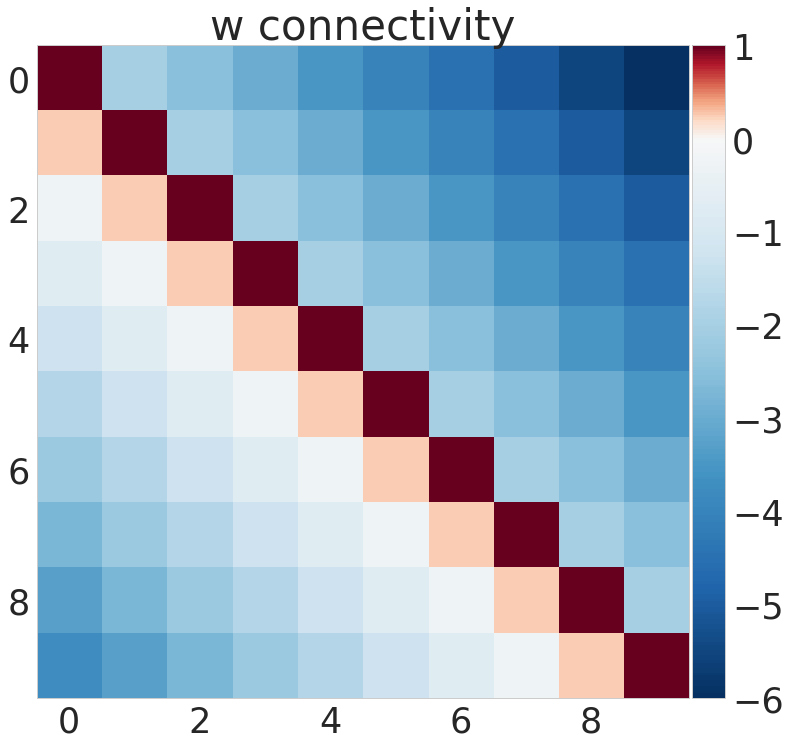

In [3]:
strict_maximum = True

g_a = 1.0
g_I = 10.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.020
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 2
minicolumns = 10
n_patterns = 5


# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'i', 'a']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Protocol
manager.run_artificial_protocol(ws=1.0, wn=0.25, wb=-2.0,alpha=0.5)

plot_weight_matrix(manager)

#### Run recall

In [4]:
T_recall = 1.0
T_cue = tau_s
I_cue = 0
manager.run_network_recall(T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, reset=True, empty_history=True)

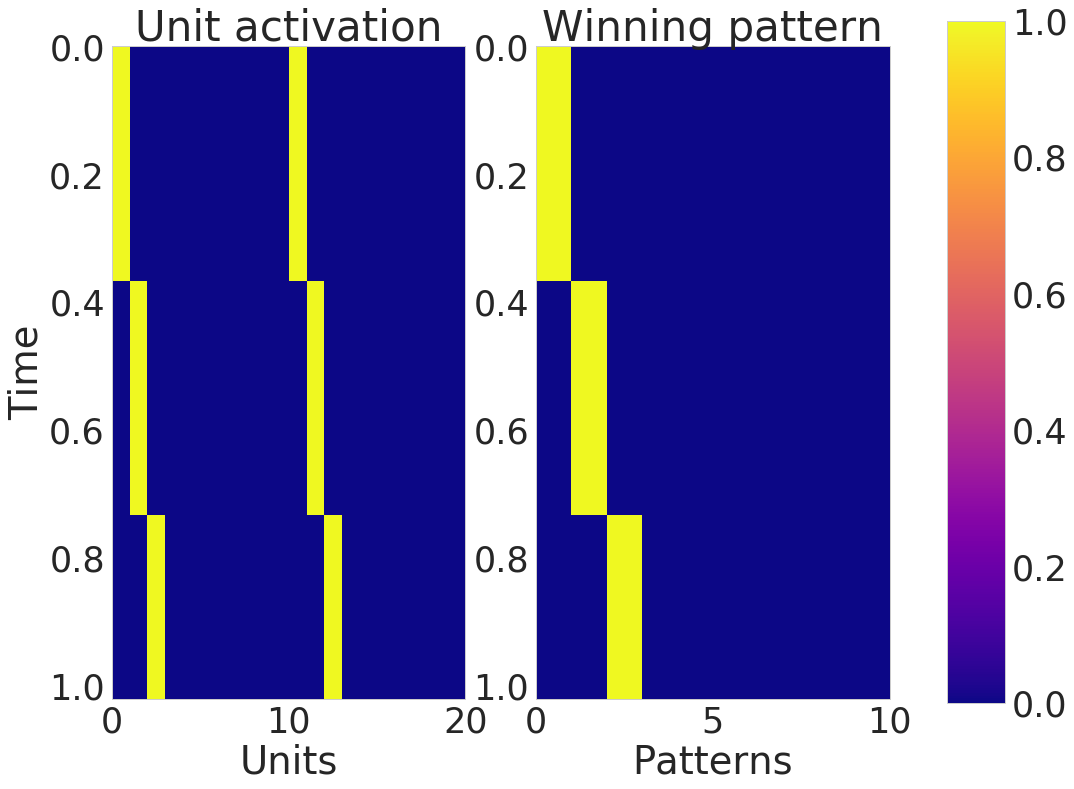

In [5]:
plot_network_activity_angle(manager)

## Re-normalizing g_a to adjust $T_{per}$

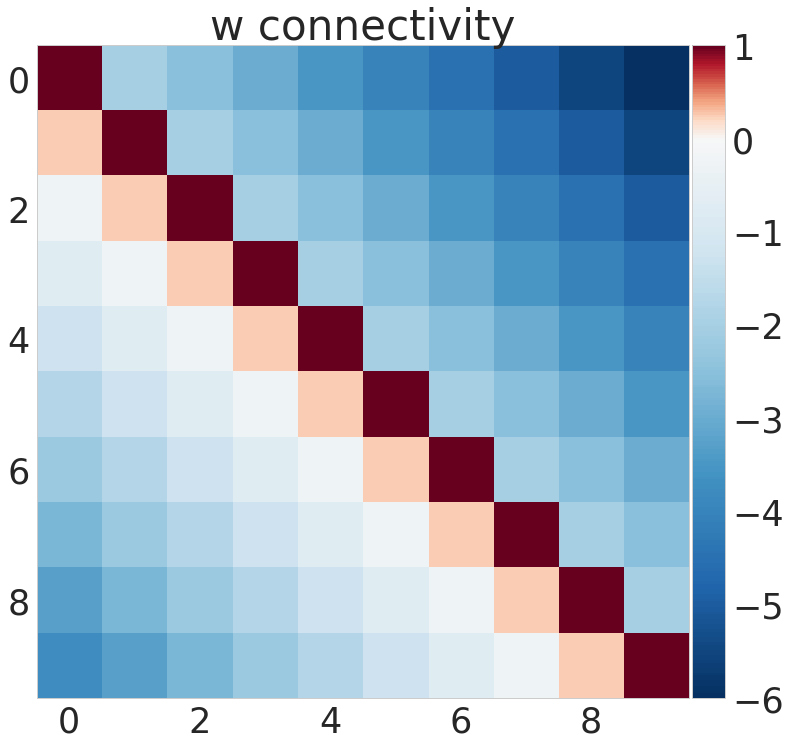

In [6]:
strict_maximum = True

g_a = 1.0
g_I = 10.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 2
minicolumns = 10
n_patterns = 5

# Training
ws = 1.0
wn = 0.25
wb = -2.0
alpha = 0.5


# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'i', 'a']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Protocol
manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb ,alpha=alpha)

plot_weight_matrix(manager)

[0.099, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.11900000000000001]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


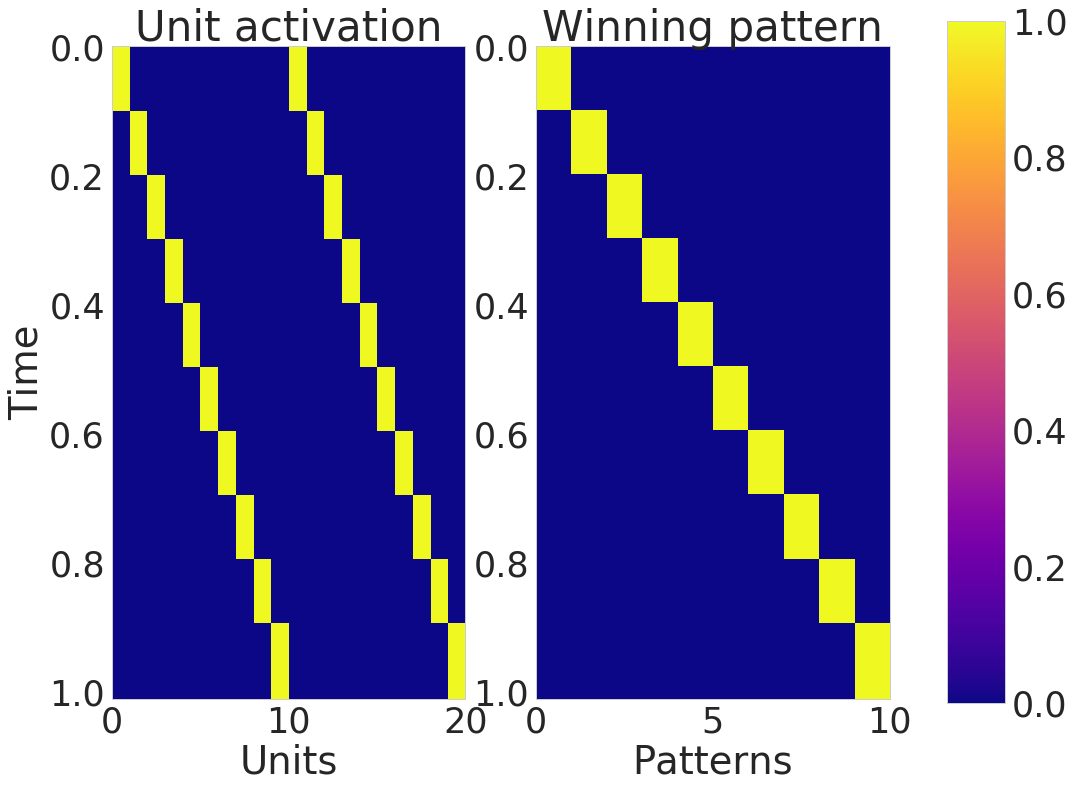

In [7]:
T_persistence = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)
T_recall = T_persistence * 10
T_cue = tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=0.009, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux
print(persistent_times)
print(pattern_sequence)
plot_network_activity_angle(manager)